In [28]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

import sklearn

In [29]:
sklearn.__version__

'0.24.2'

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [30]:
df=pandas.read_csv("Dataframe_melb.csv")
df
#hay que realizar el one hot encoding solo para las variables numericas ya que las variables categoricas
#ya fueron realizada dicha transformacion en el entregable 1

,Rooms,Distance,Bathroom,Car,Landsize,Propertycount,airbnb_record_count,airbnb_price_day_mean,CouncilArea_Banyule,CouncilArea_Bayside,...,CouncilArea_Other,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_others,Type_h,Type_t,Type_u
0,0.25,0.052743,0.000000,0.25,0.000466,0.176160,0.076352,0.126027,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.25,0.052743,0.000000,0.00,0.000360,0.176160,0.076352,0.126027,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.50,0.052743,0.333333,0.00,0.000309,0.176160,0.076352,0.126027,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.50,0.052743,0.333333,0.25,0.000217,0.176160,0.076352,0.126027,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.75,0.052743,0.000000,0.50,0.000277,0.176160,0.076352,0.126027,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.50,0.348101,0.333333,0.50,0.000591,0.103967,0.005942,0.072712,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13077,0.75,0.352321,0.333333,0.50,0.001506,0.333769,0.055853,0.116852,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13078,0.50,0.143460,0.333333,0.50,0.000769,0.286482,0.021687,0.210121,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13079,0.50,0.143460,0.333333,1.00,0.001007,0.286482,0.021687,0.210121,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Realizamos el one hot a las variables discretas: Rooms, Bathroom y Car. Las otras se consideran que son variables numéricas continúas y se añadirían demasiadas columnas al dataframe sin aportar valor significante.

In [31]:
df.describe()
#Visualizo las variables numericas del df

,Rooms,Distance,Bathroom,Car,Landsize,Propertycount,airbnb_record_count,airbnb_price_day_mean,CouncilArea_Banyule,CouncilArea_Bayside,...,CouncilArea_Other,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_others,Type_h,Type_t,Type_u
count,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,...,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000
mean,0.472307,0.214181,0.166577,0.387126,0.001264,0.336620,0.046883,0.125811,0.049155,0.039278,...,0.004250,0.048620,0.054155,0.027582,0.009158,0.050608,0.016834,0.684810,0.085009,0.230181
std,0.225781,0.123529,0.209490,0.211995,0.009342,0.205172,0.082492,0.088285,0.214539,0.193538,...,0.059305,0.214867,0.225533,0.162936,0.095199,0.219064,0.127650,0.464609,0.278905,0.420965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.130802,0.000000,0.250000,0.000393,0.193028,0.012181,0.075405,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.194093,0.000000,0.500000,0.000970,0.294098,0.021093,0.103107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.500000,0.274262,0.333333,0.500000,0.001492,0.471099,0.046049,0.149815,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df[['Rooms','Bathroom', 'Car']].nunique().sum()
#agregamos 14 columnas asi no se hace muy extensa la matriz

14

In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
one_hot_array=encoder.fit_transform(df[['Rooms', 'Bathroom', 'Car']])
#realizamos el one hot encoder a las variables numericas
one_hot_array.shape

(13081, 14)

In [36]:
col_names=encoder.get_feature_names(['Rooms', 'Bathroom', 'Car'])
#le agregamos los nombres de las columnas correspondientes

In [37]:
one_hot_df=pandas.DataFrame(one_hot_array,columns=col_names)
one_hot_df
#pasamos a data frame el array del one hot encoder

,Rooms_0.0,Rooms_0.25,Rooms_0.5,Rooms_0.75,Rooms_1.0,Bathroom_0.0,Bathroom_0.3333333333333333,Bathroom_0.6666666666666667,Bathroom_1.0,Car_0.0,Car_0.25,Car_0.5,Car_0.75,Car_1.0
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13077,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13078,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13079,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
df_unique = pandas.concat([df,one_hot_df],axis=1)
df_unique=df_unique.drop(["Rooms"],axis=1)
df_unique=df_unique.drop(["Bathroom"],axis=1)
df_unique=df_unique.drop(["Car"],axis=1)

df_unique
#eliminamos las variables originales para obtener solo un df con variables encodeadas

,Distance,Landsize,Propertycount,airbnb_record_count,airbnb_price_day_mean,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,...,Rooms_1.0,Bathroom_0.0,Bathroom_0.3333333333333333,Bathroom_0.6666666666666667,Bathroom_1.0,Car_0.0,Car_0.25,Car_0.5,Car_0.75,Car_1.0
0,0.052743,0.000466,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.052743,0.000360,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.052743,0.000309,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.052743,0.000217,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.052743,0.000277,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.348101,0.000591,0.103967,0.005942,0.072712,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13077,0.352321,0.001506,0.333769,0.055853,0.116852,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13078,0.143460,0.000769,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13079,0.143460,0.001007,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [39]:
#se vuelve a agregar las variables YearBuilt y BuildingArea al df realizado
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb=melb_df[['YearBuilt', 'BuildingArea']]
melb

,YearBuilt,BuildingArea
0,NaN,NaN
1,1900.0,79.0
2,1900.0,150.0
3,NaN,NaN
4,2014.0,142.0
...,...,...
13575,1981.0,NaN
13576,1995.0,133.0
13577,1997.0,NaN
13578,1920.0,157.0


In [40]:
merged_unique_df = df_unique.merge(
    melb,left_index=True,right_index=True
)
merged_unique_df
#unifico solo la cantidad de datos que tiene el df_unique

,Distance,Landsize,Propertycount,airbnb_record_count,airbnb_price_day_mean,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,...,Bathroom_0.3333333333333333,Bathroom_0.6666666666666667,Bathroom_1.0,Car_0.0,Car_0.25,Car_0.5,Car_0.75,Car_1.0,YearBuilt,BuildingArea
0,0.052743,0.000466,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
1,0.052743,0.000360,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1900.0,79.0
2,0.052743,0.000309,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1900.0,150.0
3,0.052743,0.000217,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
4,0.052743,0.000277,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.348101,0.000591,0.103967,0.005942,0.072712,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1960.0,129.0
13077,0.352321,0.001506,0.333769,0.055853,0.116852,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1936.0,119.0
13078,0.143460,0.000769,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
13079,0.143460,0.001007,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN


In [41]:
merged_unique_df.isna().any().tail(10)
#solo hay valores nulos en las dos variables agregadas

Bathroom_0.3333333333333333    False
Bathroom_0.6666666666666667    False
Bathroom_1.0                   False
Car_0.0                        False
Car_0.25                       False
Car_0.5                        False
Car_0.75                       False
Car_1.0                        False
YearBuilt                       True
BuildingArea                    True
dtype: bool

In [42]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_unique_df = pandas.DataFrame(scaler.fit_transform(merged_unique_df),columns=merged_unique_df.columns)
merged_unique_df

,Distance,Landsize,Propertycount,airbnb_record_count,airbnb_price_day_mean,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,...,Bathroom_0.3333333333333333,Bathroom_0.6666666666666667,Bathroom_1.0,Car_0.0,Car_0.25,Car_0.5,Car_0.75,Car_1.0,YearBuilt,BuildingArea
0,0.052743,0.000466,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
1,0.052743,0.000360,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.052743,0.000309,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.052743,0.000217,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
4,0.052743,0.000277,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.348101,0.000591,0.103967,0.005942,0.072712,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.929440,0.018996
13077,0.352321,0.001506,0.333769,0.055853,0.116852,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.900243,0.017523
13078,0.143460,0.000769,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
13079,0.143460,0.001007,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN


In [43]:
# Inputing 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
merged_unique_df_imputer = pandas.DataFrame(imputer.fit_transform(merged_unique_df),columns = merged_unique_df.columns)
merged_unique_df_imputer 

,Distance,Landsize,Propertycount,airbnb_record_count,airbnb_price_day_mean,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,...,Bathroom_0.3333333333333333,Bathroom_0.6666666666666667,Bathroom_1.0,Car_0.0,Car_0.25,Car_0.5,Car_0.75,Car_1.0,YearBuilt,BuildingArea
0,0.052743,0.000466,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.941849,0.010161
1,0.052743,0.000360,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.052743,0.000309,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.052743,0.000217,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.936740,0.014578
4,0.052743,0.000277,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.348101,0.000591,0.103967,0.005942,0.072712,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.929440,0.018996
13077,0.352321,0.001506,0.333769,0.055853,0.116852,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.900243,0.017523
13078,0.143460,0.000769,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.907786,0.025652
13079,0.143460,0.001007,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.932360,0.012252


In [44]:
merged_unique_df_imputer.isna().any().tail(10)
#se observa que se realizo la imputacion

Bathroom_0.3333333333333333    False
Bathroom_0.6666666666666667    False
Bathroom_1.0                   False
Car_0.0                        False
Car_0.25                       False
Car_0.5                        False
Car_0.75                       False
Car_1.0                        False
YearBuilt                      False
BuildingArea                   False
dtype: bool

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = merged_unique_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/home/exequiel/anaconda3/envs/Diplomatura2021/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [2]:
# Alternativa con KN Regressor

"""from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = merged_unique_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice = mice_imputer.fit_transform(
    melb_data_mice)"""

# no se ejecuta esta celda por su elevado tiempo de ejecucion ya que se usa el KNN Imputer, se muestra como se podria realizar

'from sklearn.experimental import enable_iterative_imputer\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.impute import IterativeImputer\n\nmelb_data_mice = merged_unique_df.copy(deep=True)\n\nmice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())\nmelb_data_mice = mice_imputer.fit_transform(\n    melb_data_mice)'

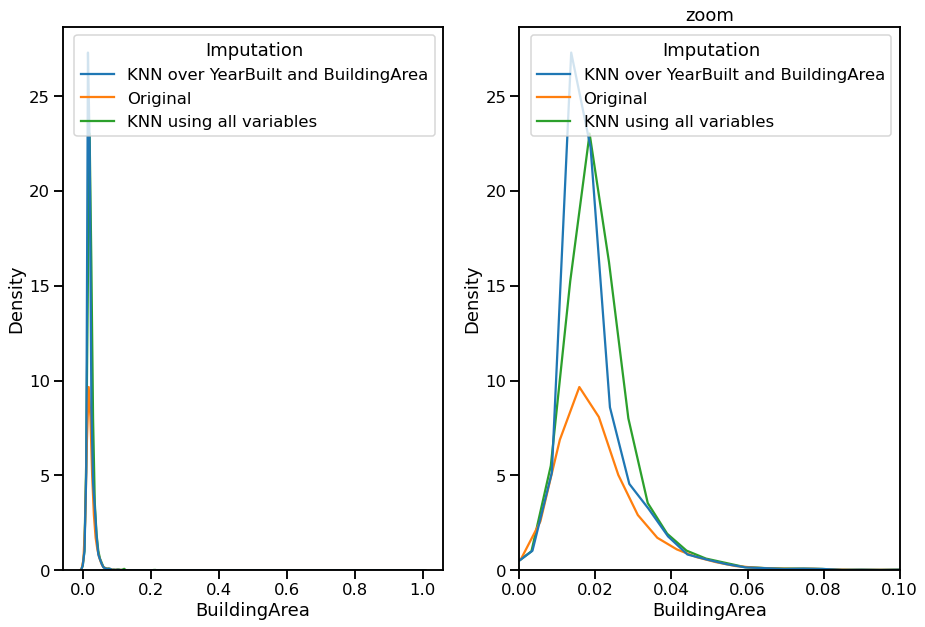

In [47]:
#Se comparan las distribuciones de las variables con distintas tecnicas de imputacion vs la original.
merged_unique_df_imputer_copy = merged_unique_df_imputer.BuildingArea.to_frame()

merged_unique_df_imputer_copy['Imputation'] = 'KNN using all variables'

mice_year_built = melb_data_mice.BuildingArea.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = merged_unique_df.BuildingArea.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
data = pandas.concat([data,merged_unique_df_imputer_copy])

fig, axes = plt.subplots(1, 2, figsize=(15, 10))


g = seaborn.kdeplot(ax=axes[0],data=data, x='BuildingArea', hue='Imputation')


g1 = seaborn.kdeplot(ax=axes[1],data=data, x='BuildingArea', hue='Imputation')
g1.set_title('zoom')
g1.set_xlim([0,0.1])

plt.show()


(0.8, 1.1)

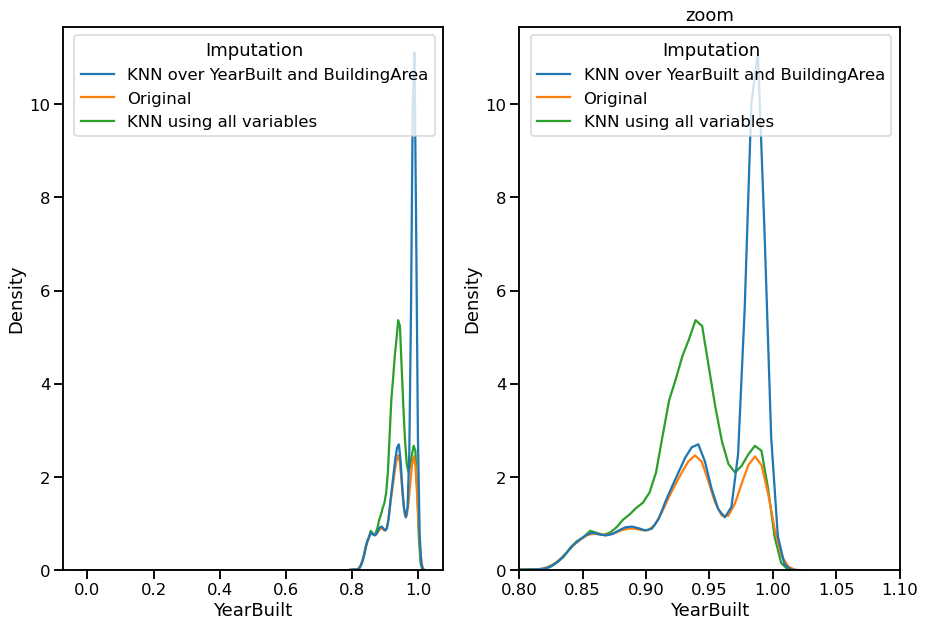

In [49]:
merged_unique_df_imputer_copy = merged_unique_df_imputer.YearBuilt.to_frame()

merged_unique_df_imputer_copy['Imputation'] = 'KNN using all variables'

mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = merged_unique_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
data = pandas.concat([data,merged_unique_df_imputer_copy])

fig, axes = plt.subplots(1, 2, figsize=(15, 10))


g = seaborn.kdeplot(ax=axes[0], data=data, x='YearBuilt', hue='Imputation')


g2 = seaborn.kdeplot(ax=axes[1],data=data, x='YearBuilt', hue='Imputation')
g2.set_title('zoom')
g2.set_xlim([0.8,1.1])


En estos graficos se puede observar que las distribuciones de las variables YearBuilt y BuildingArea imputadas utilizando todas las variables tienen dispersion mas uniforme comparado con la imputacion con una sola variable. Podemos concluir que se observa una menor variacion de sus imputaciones en el caso de utilizar una sola variable. A su vez vemos que en ambos casos se mantiene su distribucion.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [50]:
feature_cols = merged_unique_df_imputer.columns.values
feature_dict = list(merged_unique_df_imputer[feature_cols].T.to_dict().values())
feature_dict[:2]
#se crea el diccionario para utilizar en el DictVectorizer la matriz anterior con los datos ya escalados.

[{'Distance': 0.0527426160337552,
  'Landsize': 0.0004664976190146,
  'Propertycount': 0.1761599925237138,
  'airbnb_record_count': 0.076351752822341,
  'airbnb_price_day_mean': 0.1260271609796063,
  'CouncilArea_Banyule': 0.0,
  'CouncilArea_Bayside': 0.0,
  'CouncilArea_Boroondara': 0.0,
  'CouncilArea_Brimbank': 0.0,
  'CouncilArea_Casey': 0.0,
  'CouncilArea_Darebin': 0.0,
  'CouncilArea_Frankston': 0.0,
  'CouncilArea_Glen Eira': 0.0,
  'CouncilArea_Greater Dandenong': 0.0,
  'CouncilArea_Hobsons Bay': 0.0,
  'CouncilArea_Hume': 0.0,
  'CouncilArea_Kingston': 0.0,
  'CouncilArea_Knox': 0.0,
  'CouncilArea_Manningham': 0.0,
  'CouncilArea_Maribyrnong': 0.0,
  'CouncilArea_Maroondah': 0.0,
  'CouncilArea_Melbourne': 0.0,
  'CouncilArea_Melton': 0.0,
  'CouncilArea_Monash': 0.0,
  'CouncilArea_Moonee Valley': 0.0,
  'CouncilArea_Moreland': 0.0,
  'CouncilArea_Nillumbik': 0.0,
  'CouncilArea_Other': 0.0,
  'CouncilArea_Port Phillip': 0.0,
  'CouncilArea_Stonnington': 0.0,
  'CouncilAr

In [51]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)
#Se crea la matriz esparsa

In [52]:
feature_matrix

<13081x53 sparse matrix of type '<class 'numpy.float64'>'
	with 693293 stored elements in Compressed Sparse Row format>

In [53]:
#evaluo la dimension final de la matriz para no generar un conflicto en la memoria
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = numpy.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matrix too big! Using only first {} of {} rows".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 2.64 MB
Final size: 2.64


In [54]:
if dense_feature_matrix.shape[0] < len(merged_unique_df_imputer):
  melb_df_sample = merged_unique_df_imputer.iloc[:dense_feature_matrix.shape[0]]
else:
  melb_df_sample = merged_unique_df_imputer
#se achica la matriz si se mayor a 10 Mb y si no se mantiene igual.

In [55]:
melb_df_sample
#vemos como utiliza solo 3788 filas de la matriz

,Distance,Landsize,Propertycount,airbnb_record_count,airbnb_price_day_mean,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,...,Bathroom_0.3333333333333333,Bathroom_0.6666666666666667,Bathroom_1.0,Car_0.0,Car_0.25,Car_0.5,Car_0.75,Car_1.0,YearBuilt,BuildingArea
0,0.052743,0.000466,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.941849,0.010161
1,0.052743,0.000360,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.052743,0.000309,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.052743,0.000217,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.936740,0.014578
4,0.052743,0.000277,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.348101,0.000591,0.103967,0.005942,0.072712,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.929440,0.018996
13077,0.352321,0.001506,0.333769,0.055853,0.116852,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.900243,0.017523
13078,0.143460,0.000769,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.907786,0.025652
13079,0.143460,0.001007,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.932360,0.012252


In [56]:
scaled_dense_feature_matrix = dense_feature_matrix
#paso la matriz a densa

In [64]:
#se aplica algoritmo de analisis de componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape

(13081, 30)

In [65]:
pca.explained_variance_ratio_
#se busca reducir la dimensionalidad observando las componentes con mayor varianza

array([0.23174483, 0.11757343, 0.08879729, 0.07571071, 0.0437088 ,
       0.03586774, 0.03183787, 0.02793387, 0.02711434, 0.02563841,
       0.02333603, 0.02183586, 0.0203129 , 0.01830937, 0.01603366,
       0.01578072, 0.01517216, 0.01457213, 0.0138993 , 0.01257982,
       0.01148489, 0.01139386, 0.01031504, 0.01028049, 0.00948389,
       0.00848921, 0.0081376 , 0.00736159, 0.00693071, 0.00638106],
      dtype=float32)

Text(0.5, 0, 'Components')

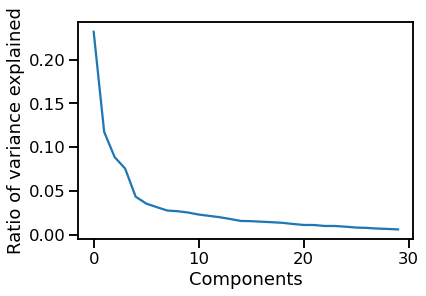

In [66]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
#observamos que luego de la quinta componente la descripcion de la varianza es poco descriptiva (cercana a 0).

Graficamos la varianza acumulada.

Se toma un criterio una varianza acumulada igual a 90%

In [90]:
pca.explained_variance_ratio_[0:22].sum()

0.90063804

<ipython-input-130-8e55a552b104>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


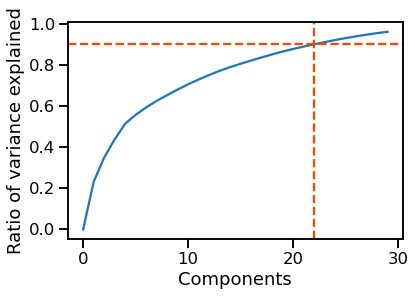

In [130]:
aux = []
for i in range(30):
    aux.append(pca.explained_variance_ratio_[0:i].sum())
    
fig, ax = plt.subplots(1)
seaborn.lineplot(x=range(pca.n_components),y=aux, ax=ax)
ax.axvline(22, color='orangered', linestyle='--')
ax.axhline(0.9, color='orangered', linestyle='--')

plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
fig.show()

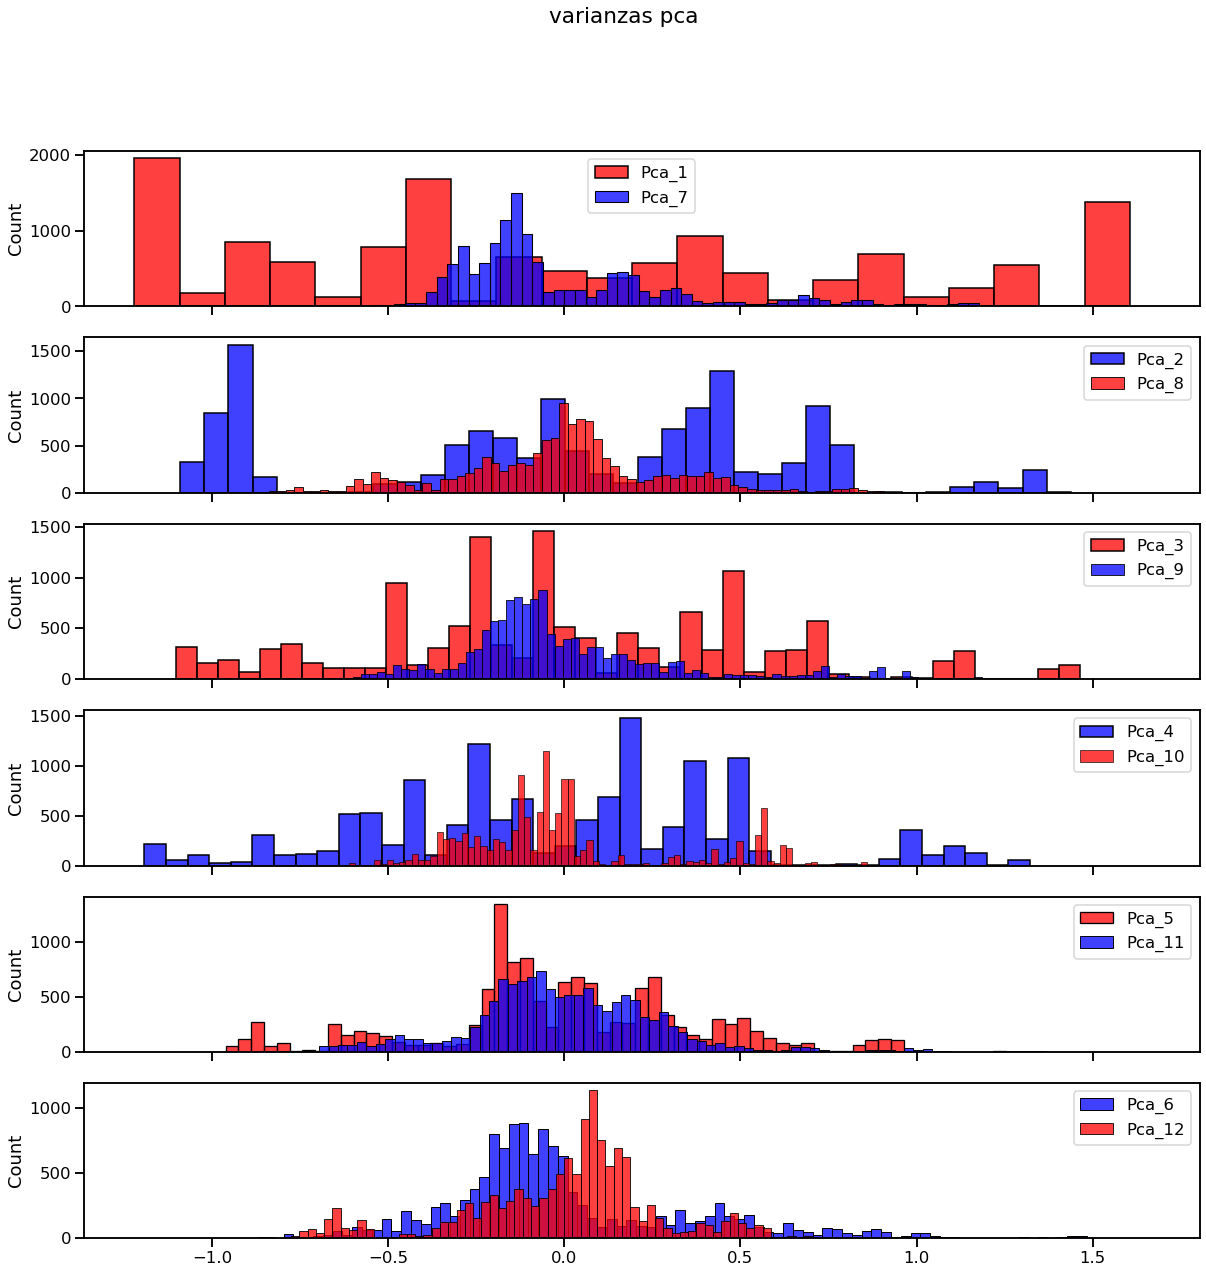

In [91]:
#se grafican las proyecciones de las 12 componentes principales para observar la disminucion de la varianza.
#se realiza superponiendo una componente vs el valor de la sexta componente siguiente.
fig, axes = plt.subplots(6, figsize=(20, 20),sharex=True)
fig.suptitle('varianzas pca')
color1='red'
color2='blue'

seaborn.histplot(ax=axes[0], x=proyected_features[:,0], color=color1, label='Pca_1')
seaborn.histplot(ax=axes[1], x=proyected_features[:,1], color=color2,label='Pca_2')
seaborn.histplot(ax=axes[2], x=proyected_features[:,2], color=color1, label='Pca_3')
seaborn.histplot(ax=axes[3], x=proyected_features[:,3], color=color2, label='Pca_4')
seaborn.histplot(ax=axes[4], x=proyected_features[:,4], color=color1, label='Pca_5')
seaborn.histplot(ax=axes[5], x=proyected_features[:,5], color=color2, label='Pca_6')

seaborn.histplot(ax=axes[0], x=proyected_features[:,6], color=color2, label='Pca_7')
seaborn.histplot(ax=axes[1], x=proyected_features[:,7], color=color1, label='Pca_8')
seaborn.histplot(ax=axes[2], x=proyected_features[:,8], color=color2, label='Pca_9')
seaborn.histplot(ax=axes[3], x=proyected_features[:,9], color=color1, label='Pca_10')
seaborn.histplot(ax=axes[4], x=proyected_features[:,10], color=color2, label='Pca_11')
seaborn.histplot(ax=axes[5], x=proyected_features[:,11], color=color1, label='Pca_12')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
axes[5].legend()

Se puede observar como las varianzas disminuyen a medida que aumentan las Pca.
Decidimos obtener solo las 5 primeras componentes principales debido a que creemos que aportan la mayor informacion de la varianza.

In [140]:
pcas = []
for i in range(1,23):
    pcas.append("Pca_" + str(i))
melb_df_sample[pcas] = proyected_features[:,:22]

<AxesSubplot:xlabel='Pca_1', ylabel='Pca_2'>

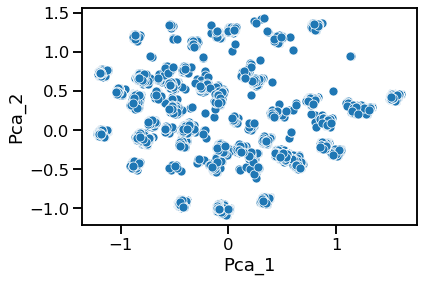

In [141]:
seaborn.scatterplot(data=melb_df_sample, x='Pca_1', y='Pca_2')

Se realizan gráficos entre componentes, no se pueden 

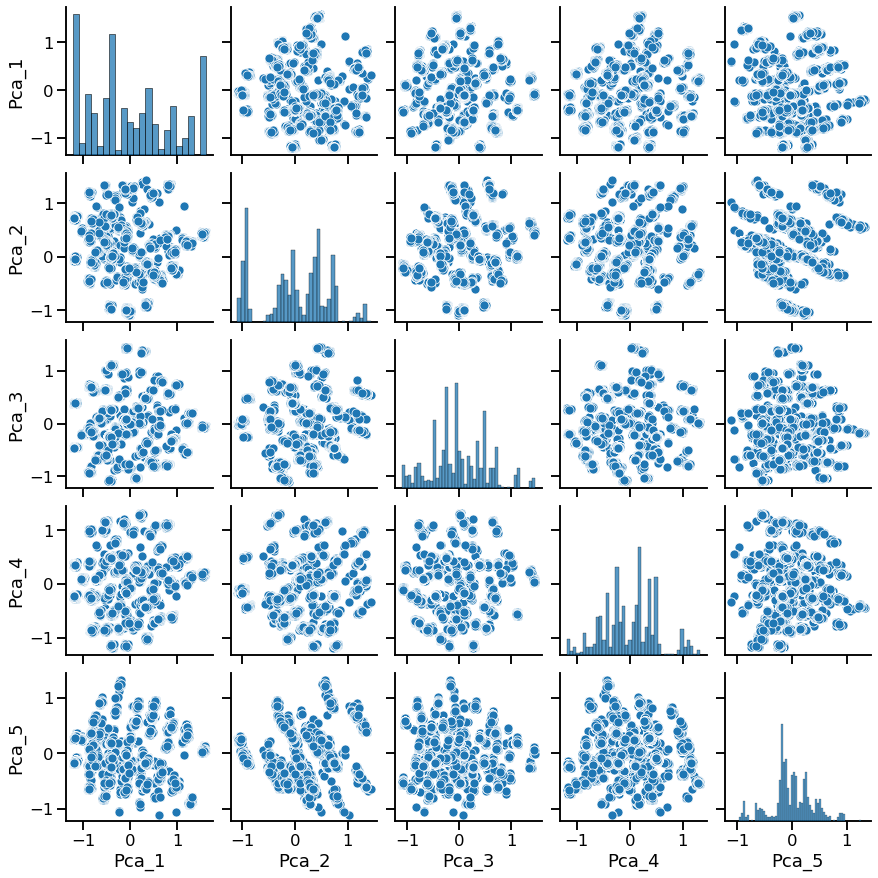

In [142]:
seaborn.pairplot(data=melb_df_sample,
                x_vars=['Pca_1', 'Pca_2','Pca_3', 'Pca_4','Pca_5'],
                y_vars=['Pca_1', 'Pca_2','Pca_3', 'Pca_4','Pca_5'])
#se realizan graficos entre las componentes

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

Ya esta dispuesto con los nombres originales de la matriz.

In [143]:
melb_df_sample.to_csv('Dataframe_melb_pca.csv',index=False)

In [145]:
new_df=pandas.read_csv("Dataframe_melb_pca.csv")
new_df

,Distance,Landsize,Propertycount,airbnb_record_count,airbnb_price_day_mean,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,...,Pca_13,Pca_14,Pca_15,Pca_16,Pca_17,Pca_18,Pca_19,Pca_20,Pca_21,Pca_22
0,0.052743,0.000466,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,-0.355742,0.140556,-0.141968,0.001924,0.119792,0.742535,0.240183,-0.162337,0.193798,-0.034064
1,0.052743,0.000360,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,-0.446220,0.329149,-0.205236,-0.083566,0.031050,0.610444,-0.011829,-0.073964,0.110083,0.012014
2,0.052743,0.000309,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,-0.486537,0.341110,-0.266766,-0.179423,-0.073059,0.622719,-0.118616,-0.110858,0.091075,0.014100
3,0.052743,0.000217,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,-0.396094,0.152503,-0.203474,-0.093942,0.015685,0.754765,0.133401,-0.199286,0.174793,-0.031992
4,0.052743,0.000277,0.176160,0.076352,0.126027,0.0,0.0,0.0,0.0,0.0,...,-0.388459,0.122699,-0.225049,-0.059427,0.022682,0.799678,0.210664,-0.220495,0.205997,-0.048043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.348101,0.000591,0.103967,0.005942,0.072712,0.0,0.0,0.0,0.0,0.0,...,-0.047304,-0.062836,-0.012755,-0.010407,0.035766,-0.000842,0.035527,0.070612,-0.014086,-0.063782
13077,0.352321,0.001506,0.333769,0.055853,0.116852,0.0,0.0,0.0,0.0,0.0,...,-0.089630,-0.085448,-0.065001,-0.005539,0.007097,0.016514,0.095881,0.117936,0.018845,-0.155630
13078,0.143460,0.000769,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,-0.052218,-0.104899,-0.057658,0.000662,0.014907,0.032629,0.120294,0.161784,-0.037195,-0.301011
13079,0.143460,0.001007,0.286482,0.021687,0.210121,0.0,0.0,0.0,0.0,0.0,...,0.277413,-0.210278,-0.077605,0.028699,0.010628,-0.041230,-0.037413,0.618528,0.665419,-0.322269


# Ejercicio 5: Documentación

La documentación se encuentra en el archivo DOCUMENTATION.md